# 作業
- 作業目標 : 用 iris (dataset.load_iris()) 資料嘗試跑 hierarchical clustering

In [3]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

載入 相關套件 並 執行 hierarchical clustering 實驗 ...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering

In [7]:
X.shape, y.shape, np.unique(y)

((150, 4), (150,), array([0, 1, 2]))

In [35]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

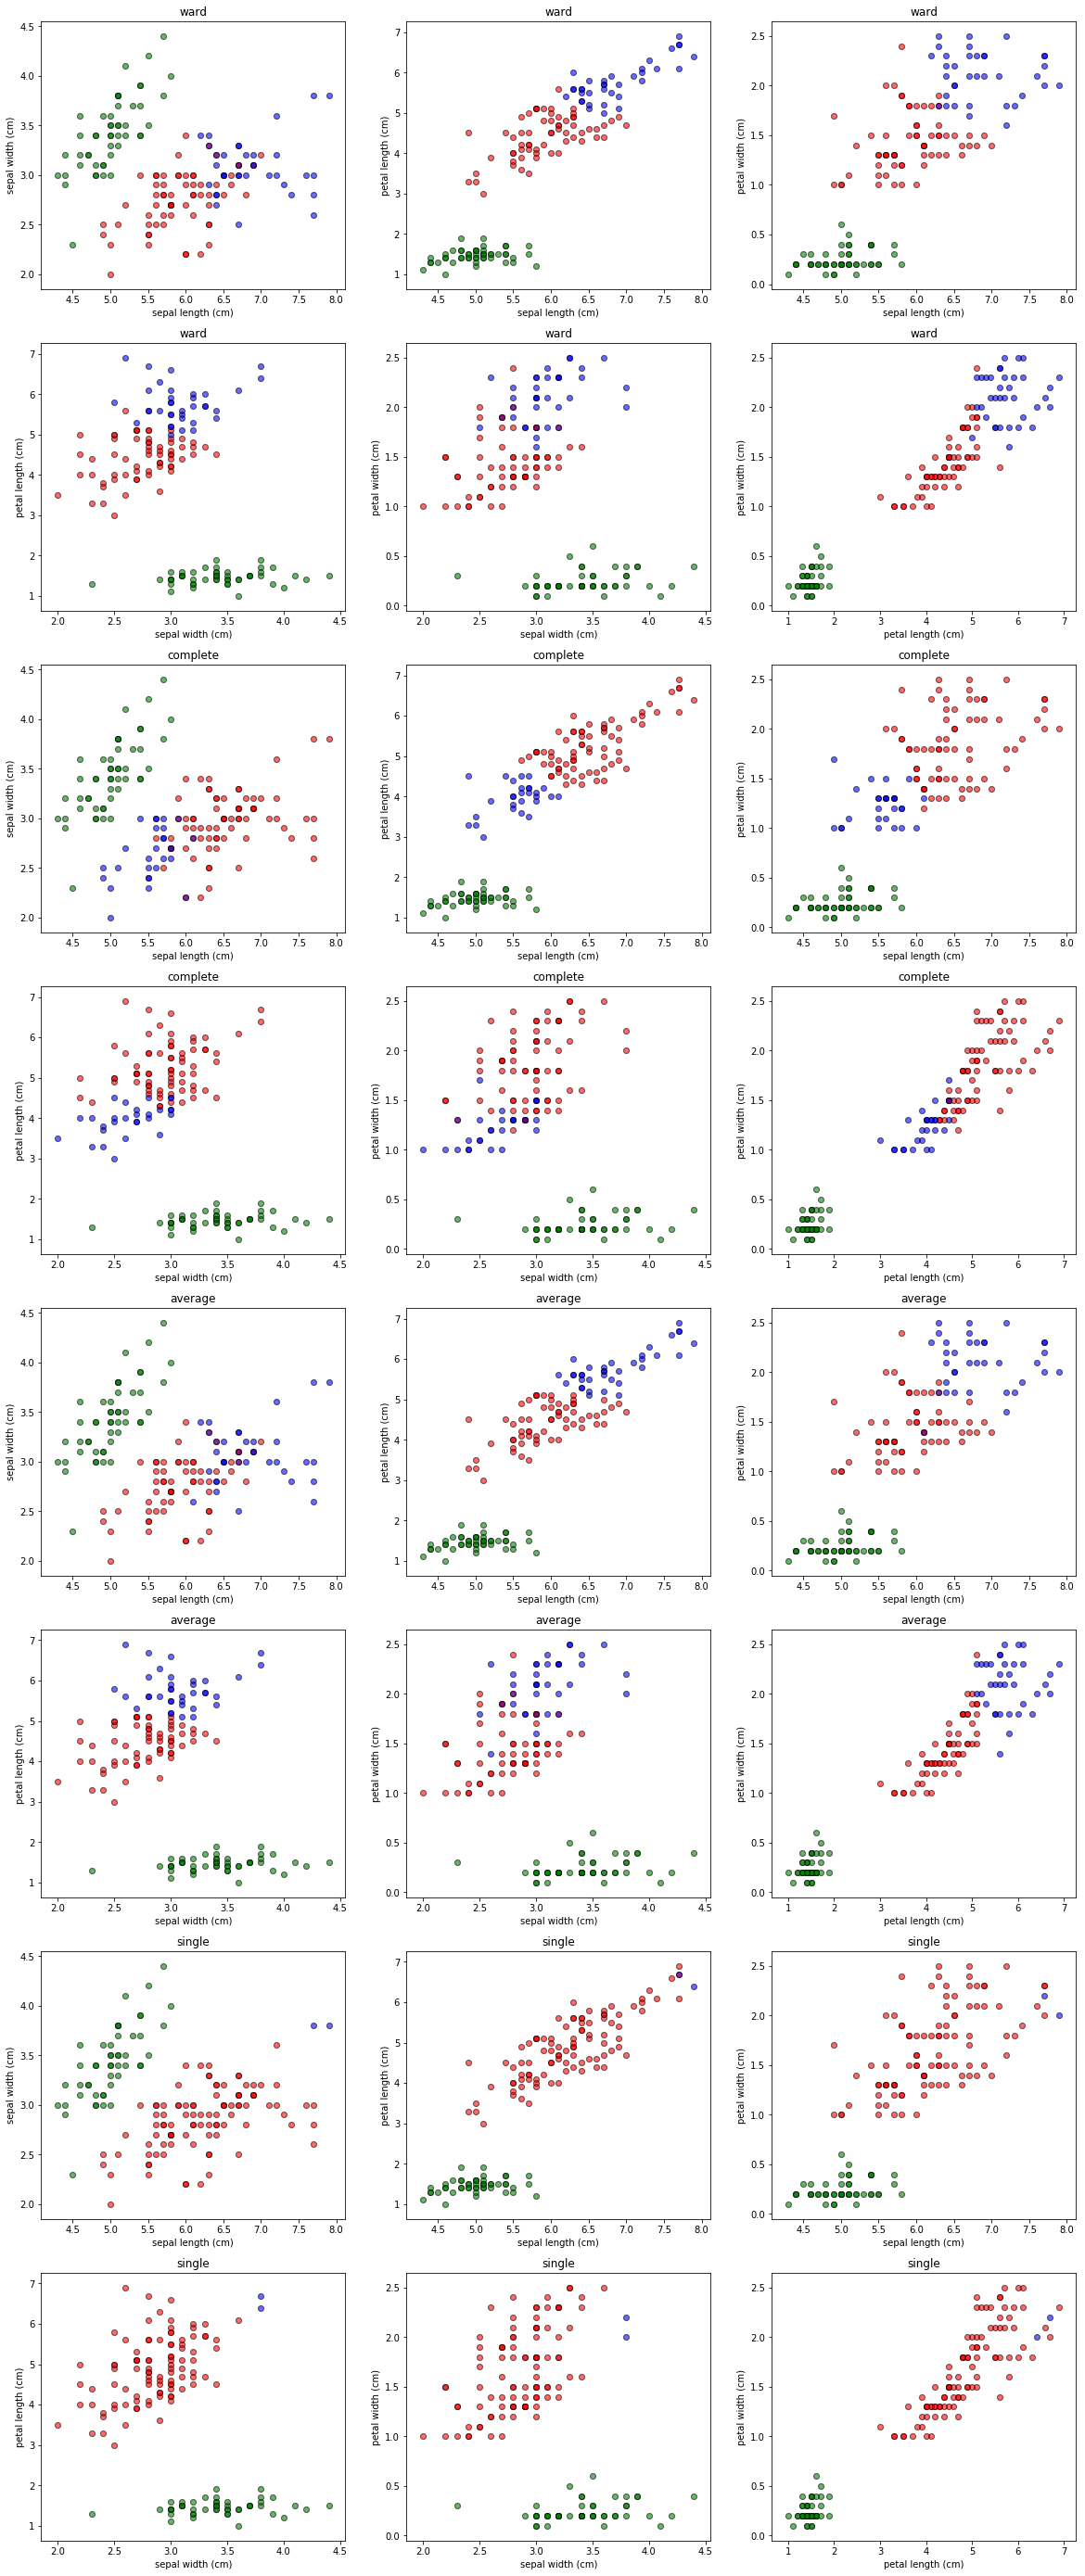

In [49]:
# cluster
plt.figure(figsize=(20, 50))
linkage = ["ward", "complete", "average", "single"]
cluster_result = {l: np.zeros((1, len(y))) for l in linkage}
feature_combination = [(0, 1, 'sepal length (cm)', 'sepal width (cm)'),
                       (0, 2, 'sepal length (cm)', 'petal length (cm)'),
                       (0, 3, 'sepal length (cm)', 'petal width (cm)'),
                       (1, 2, 'sepal width (cm)', 'petal length (cm)'),
                       (1, 3, 'sepal width (cm)', 'petal width (cm)'),
                       (2, 3, 'petal length (cm)', 'petal width (cm)')]
cnt = 1
for idx, link in enumerate(linkage):
    cluster = AgglomerativeClustering(n_clusters=3, linkage=link)
    cluster.fit(X)
    labels = cluster.labels_

    cluster_result[link] = np.array(labels).reshape(1, -1)
    
    for (feature_a, feature_b, x, y) in feature_combination:
        plt.subplot(8, 3, cnt)
        cnt+=1
        for i in range(3):
            plt.scatter(X[labels==0][:, feature_a], X[labels==0][:, feature_b], alpha=0.25, c='R', edgecolors='k')
            plt.scatter(X[labels==1][:, feature_a], X[labels==1][:, feature_b], alpha=0.25, c='G', edgecolors='k')
            plt.scatter(X[labels==2][:, feature_a], X[labels==2][:, feature_b], alpha=0.25, c='B', edgecolors='k')
            plt.xlabel(x)
            plt.ylabel(y)
            plt.title(link)    